<a href="https://colab.research.google.com/github/rahulrajpr/TensorFlowDeveloperCertifcateTraining/blob/NeuralNetworkClassification/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classifcation - Image

dataset : fashion_mnist : https://github.com/zalandoresearch/fashion-mnist

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

Muti-class classification of images

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import random

In [251]:
import tensorflow as tf

In [252]:
# importing the dataset from keras library
from tensorflow.keras.datasets import fashion_mnist

In [253]:
(train_data, train_label), (test_data,test_label) = fashion_mnist.load_data()

Lets investigate the shape and dimension of one element training sample

In [254]:
train_data[0].shape,train_label.shape

((28, 28), (60000,))

In [255]:
train_data[0].ndim,train_label.ndim

(2, 1)

In [256]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Lets plot one of the sample in image format uing plt.imshow()

label :  9 



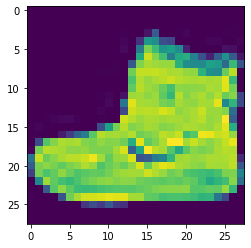

In [257]:
plt.imshow(train_data[0])
print('label : ',train_label[0],'\n')
plt.show()

Visualize some random samples of the data

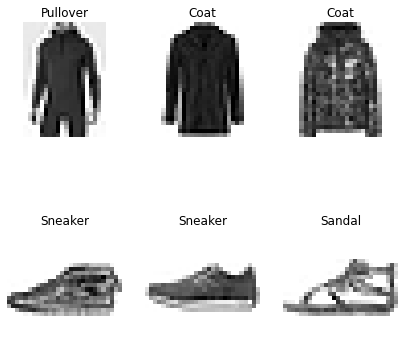

In [258]:
plt.figure(figsize=[7,7])

for i in range(6):
  plt.subplot(2,3,i+1)
  index_range = range(len(train_data))
  random_index = random.choice(index_range)
  
  sample = train_data[random_index]
  sample_label = labels[train_label[random_index]]

  plt.imshow(sample, cmap = plt.cm.binary)
  plt.title(sample_label)
  
  plt.axis(False)

Intial elements of the problem solving approach

- Input Shape : `28 x 28` -- > train_data[0].shape
- Output Shpe : `10` -- > len(train_label
- Activation function in hidden layer : `Relu`
- Activation fucntion in the output layer : `softmax` (muti-class classification)
- Note : Sigmoid is used for binary classification.
- Loss = tf.keras.losses.CategoricalCrossEntropy
- If the labels are in one-hot encoded, use `CategoricalCrossEntropy()`
- If the labels are in the integers form , use `SparseCategoricalCrossEntropy()`

Important : 

For troubleshoot the shape error, create an input leyer to fatten the `28 X 28 tensor to a 784 fatterned tensor`

In [259]:
input_shape = train_data[0].shape
label_count = len(np.unique(train_label))

Model_1

In [260]:
tf.random.set_seed(42)

# create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape, name = 'input_layer'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(label_count, activation = 'softmax')]
)

# compile the model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [261]:
# lets fit the model

history_1 = model_1.fit(x = train_data,
                      y = train_label,
                      epochs = 20,
                      verbose = 0,
                      validation_data = (test_data, test_label))

In [262]:
model_1.evaluate(test_data, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 1.0166 - accuracy: 0.5806


[1.0165904760360718, 0.5806000232696533]

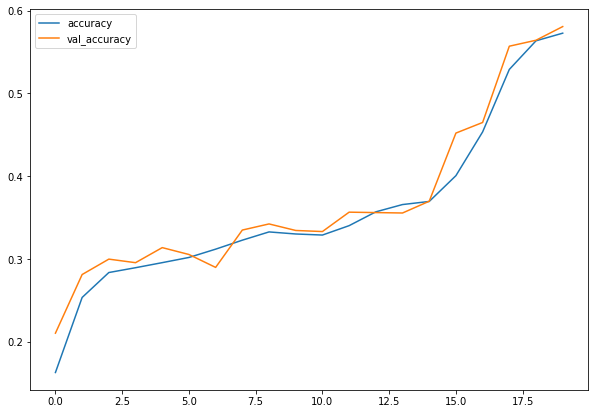

In [263]:
pd.DataFrame(history_1.history)[['accuracy','val_accuracy']].plot(figsize = [10,7])
plt.legend();

Model_2

Chanage : Normalize the input data

In [264]:
train_min = np.min(train_data)
train_max = np.max(train_data)
train_min,train_max

(0, 255)

In [265]:
train_data_norm = (train_data - train_min)/float(train_max)
test_data_norm = (test_data - train_min)/float(train_max)

In [266]:
tf.random.set_seed(42)
# create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(label_count, activation = 'softmax')
])

In [267]:
# compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [268]:
history_2 = model_2.fit(x = train_data_norm, y = train_label, 
            epochs = 20,
            validation_data = [test_data_norm, test_label])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [269]:
model_2.evaluate(test_data_norm, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.8075


[0.5659515261650085, 0.8075000047683716]

### Model_3

Change : increasing the number of nuerons in the hidden layer to 10

In [282]:
tf.random.set_seed(42)

# create model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [283]:
# compile the model

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [285]:
# fit the model

history_3 = model_3.fit(x = train_data_norm,
                        y = train_label,
                        epochs = 20,
                        validation_data = (test_data_norm, test_label))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4300 - accuracy: 0.8481 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8551 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4029 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3948 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3883 - accuracy: 0.8632 - val_loss: 0.4507 - val_accuracy:

In [286]:
model_3.evaluate(test_data_norm, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8568


[0.4049094617366791, 0.8568000197410583]

Lets plot the performance of both the model

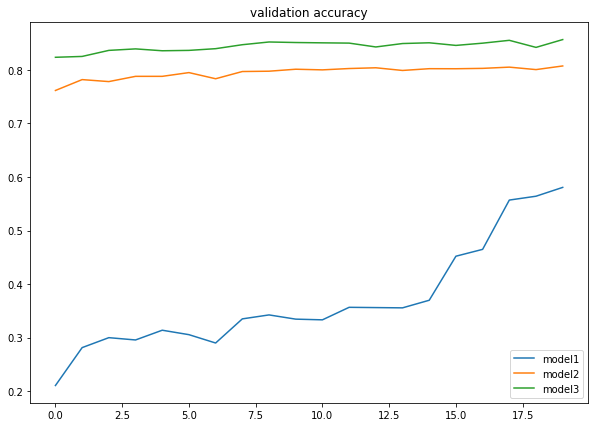

In [315]:
hist_dict = {'model1': history_1.history['val_accuracy'],
     'model2': history_2.history['val_accuracy'],
     'model3': history_3.history['val_accuracy']}

pd.DataFrame(hist_dict).plot(figsize = [10,7], title = 'validation accuracy')
plt.legend();

## Finding out the optimum Learning Rate

In [318]:
1e-4

0.0001

In [337]:
# set the random seed

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [338]:
# compile the model

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [339]:
# create learning rate scheduler

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 ** (epoch/10))

In [340]:
# fitting the model

history_4 = model_4.fit(x = train_data_norm,
                        y = train_label, 
                        epochs = 30, 
                        validation_data = (test_data_norm, test_label),
                        callbacks = [lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5956 - accuracy: 0.4259 - val_loss: 1.0646 - val_accuracy: 0.6720 - lr: 1.0000e-04
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7870 - accuracy: 0.7715 - val_loss: 0.6620 - val_accuracy: 0.7902 - lr: 1.2589e-04
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5757 - accuracy: 0.8140 - val_loss: 0.5681 - val_accuracy: 0.8095 - lr: 1.5849e-04
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5148 - accuracy: 0.8266 - val_loss: 0.5238 - val_accuracy: 0.8215 - lr: 1.9953e-04
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4828 - accuracy: 0.8356 - val_loss: 0.5040 - val_accuracy: 0.8263 - lr: 2.5119e-04
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4608 - accuracy: 0.8400 - val_loss: 0.4960 - val_accuracy: 0.8293 - lr: 3.1623e-04
Epoch 7/30
1875/1875 [============

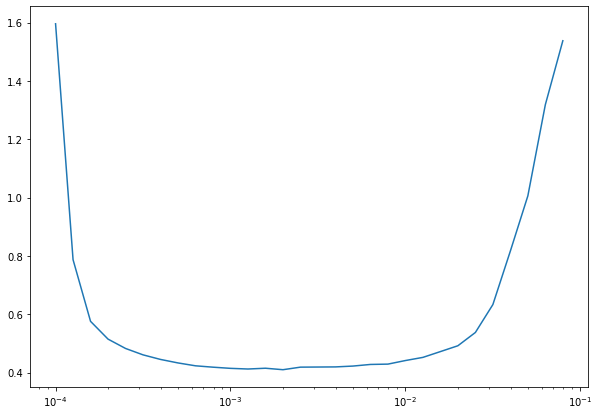

In [353]:
plt.figure(figsize =[10,7])
plt.semilogx(history_4.history['lr'],history_4.history['loss'])
plt.show()

Note : The best region where the loss is sharply dropping could be tries in another model

Model 5

Adjusting the learming rate at 1e-4, give a 30 number of epochs

In [372]:
# create random seed 

tf.random.set_seed(42)

# create model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [373]:
# compile the model

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 1e-4),
                metrics = ['accuracy'])

In [374]:
# fit the model

history_5 = model_5.fit(x = train_data_norm,
                        y = train_label,
                        epochs = 20, 
                        validation_data = (test_data_norm, test_label))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5956 - accuracy: 0.4259 - val_loss: 1.0646 - val_accuracy: 0.6720
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8234 - accuracy: 0.7640 - val_loss: 0.6983 - val_accuracy: 0.7862
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6128 - accuracy: 0.8078 - val_loss: 0.6011 - val_accuracy: 0.8044
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5498 - accuracy: 0.8192 - val_loss: 0.5593 - val_accuracy: 0.8136
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5182 - accuracy: 0.8261 - val_loss: 0.5378 - val_accuracy: 0.8164
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4975 - accuracy: 0.8310 - val_loss: 0.5227 - val_accuracy: 0.8222
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4834 - accuracy: 0.8346 - val_loss: 0.5111 - val_accuracy:

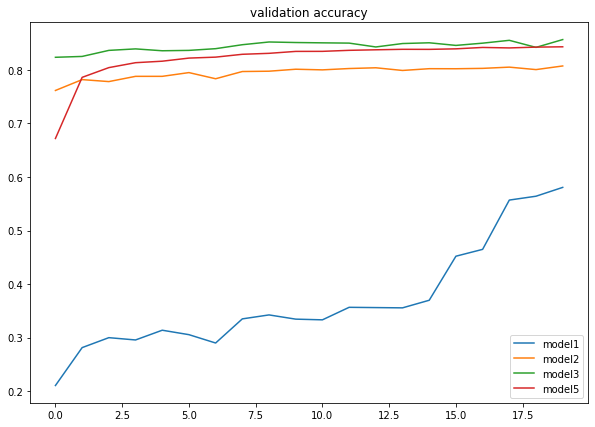

In [375]:
hist_dict = {'model1': history_1.history['val_accuracy'],
     'model2': history_2.history['val_accuracy'],
     'model3': history_3.history['val_accuracy'],
     'model5': history_5.history['val_accuracy']}

pd.DataFrame(hist_dict).plot(figsize = [10,7], title = 'validation accuracy')
plt.legend();

**Inference :** Model 3 seems better performing out of all the other models

### Lets Evaluate the model using the confusion matrix

In [393]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [387]:
# the output layer of 10 units retuns an array of probabilities for each category in order
pred_prob= model_3.predict(test_data_norm)
pred_prob.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [390]:
# to get to the prediction, we can use the tf.argmax - retun the index position of the higest value

pred = tf.argmax(pred_prob, axis = 1)
pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>

In [391]:
confusion_matrix(test_label, pred)

array([[803,   5,  11,  40,   4,   0, 122,   0,  15,   0],
       [  1, 964,   1,  26,   2,   0,   5,   0,   1,   0],
       [ 18,   6, 716,  14, 147,   0,  94,   0,   5,   0],
       [ 25,  19,   5, 849,  53,   0,  44,   0,   5,   0],
       [  0,   1,  83,  22, 820,   0,  71,   0,   3,   0],
       [  0,   0,   0,   1,   0, 953,   0,  30,   2,  14],
       [130,   2, 103,  36,  75,   1, 637,   1,  15,   0],
       [  0,   0,   0,   0,   0,  27,   0, 955,   0,  18],
       [  2,   0,   4,   9,   5,   5,  27,   4, 943,   1],
       [  0,   1,   0,   0,   0,  14,   1,  54,   2, 928]])

In [394]:
# function to pretiffy the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)
     

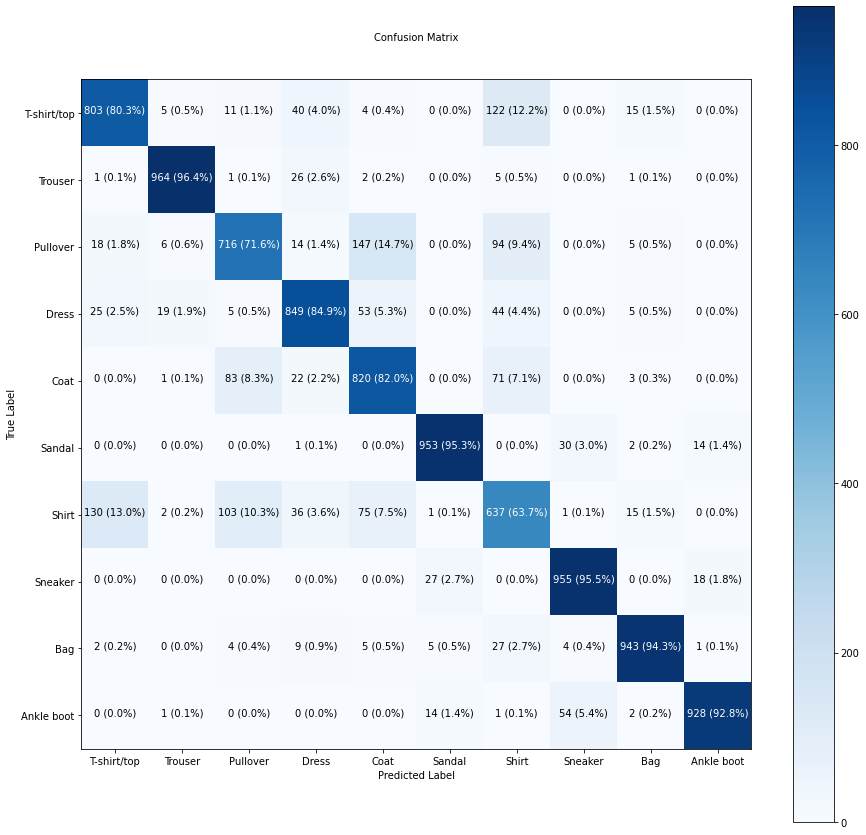

In [402]:
make_confusion_matrix(y_true = test_label, y_pred = pred, classes=labels, figsize=(15, 15), text_size=10)

Create a function to visualise the predictions randomly

In [403]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong
     

1/1 [==============================] - 0s 20ms/step


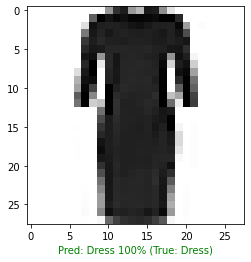

In [421]:
# Check out a random image as well as its prediction
plot_random_image(model=model_3,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on 
                  true_labels=test_label,
                  classes=labels)